In [1]:
# standard libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get the datetime library for date & time calcs
from datetime import datetime, timedelta

In [2]:
# get the new file

# load the the main data sets
wideData = os.path.normpath("C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/wideDataforRollup.csv")
rollupData = pd.read_csv(wideData)

In [3]:
rollupData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141416 entries, 0 to 4141415
Data columns (total 43 columns):
Unnamed: 0                   int64
Dateopened                   object
Persontype                   object
Personcode                   int64
Channel                      object
State                        object
End_Date                     object
Observed                     int64
Cleancuststart               object
Custyears                    float64
Cleandateclosed              object
Productyears                 float64
Age                          float64
Customergroups               object
Closed                       int64
Auto                         float64
Business_Cd                  float64
Business_Checking            float64
Business_Money_Market        float64
Business_Odloc               float64
Business_Savings             float64
Cdira                        float64
Checking                     float64
Commercial_Loan              float64
Credit_Card    

In [4]:
# convert Personcode to a string

# rollupData['Personcode'] = rollupData.applymap(str).iloc[:,3]

rollupData['Personcode'] = rollupData['Personcode'].astype(str)

In [5]:
rollupData.head()

,Unnamed: 0,Dateopened,Persontype,Personcode,Channel,State,End_Date,Observed,Cleancuststart,Custyears,...,Loansavings_Secured,Loc,Locpersonal,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings
0,0,1989-11-29,F,354668,Branch,PA,2016-12-15,1,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1996-09-30,F,132166,Branch,PA,2016-12-15,1,1996-09-19,20.252055,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1999-03-26,F,5272647,Branch,PA,2016-12-15,1,1999-03-19,17.756164,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,2001-11-02,F,131869,Branch,PA,2016-12-15,1,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,2001-11-02,F,1019639,Branch,PA,2016-12-15,1,2013-04-27,3.638356,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# make the customer id by concatenating two strings

rollupData['CustID'] = rollupData['Persontype'] + rollupData['Personcode']

In [7]:
# reduce the dimensions to key data
# need to combine in chunks op = df[list(df.columns[0:899]) + list(df.columns[3593:])]

wideRed = rollupData[list(rollupData.columns[4:6]) + list(rollupData.columns[13:44])]

In [8]:
wideRed.head()

,Channel,State,Customergroups,Closed,Auto,Business_Cd,Business_Checking,Business_Money_Market,Business_Odloc,Business_Savings,...,Loc,Locpersonal,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings,CustID
0,Branch,PA,Boomers+,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F354668
1,Branch,PA,Boomers+,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F132166
2,Branch,PA,Boomers+,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F5272647
3,Branch,PA,Boomers+,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F131869
4,Branch,PA,Boomers+,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F1019639


In [9]:
# perform the aggregation

groupedWide = wideRed.groupby(['CustID', 'Customergroups'], as_index = False).max()

In [10]:
groupedWide.head()

,CustID,Customergroups,Channel,State,Closed,Auto,Business_Cd,Business_Checking,Business_Money_Market,Business_Odloc,...,Loansavings_Secured,Loc,Locpersonal,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings
0,F10000,Boomers+,Branch,RI,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F1000008,Boomers+,Branch,CT,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,F100001,Boomers+,Branch,PA,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F1000013,Gen X,Branch,MA,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,F1000030,Boomers+,Branch,PA,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# now sum across
groupedWide['NumProducts'] = groupedWide.iloc[:, 5:].sum(axis = 1)

In [12]:
groupedWide.head()

,CustID,Customergroups,Channel,State,Closed,Auto,Business_Cd,Business_Checking,Business_Money_Market,Business_Odloc,...,Loc,Locpersonal,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings,NumProducts
0,F10000,Boomers+,Branch,RI,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,F1000008,Boomers+,Branch,CT,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,F100001,Boomers+,Branch,PA,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,F1000013,Gen X,Branch,MA,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
4,F1000030,Boomers+,Branch,PA,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0


In [13]:
# get a view of the num products

groupedWide['NumProducts'].describe()

count    967908.000000
mean          2.774668
std           1.575574
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          16.000000
Name: NumProducts, dtype: float64

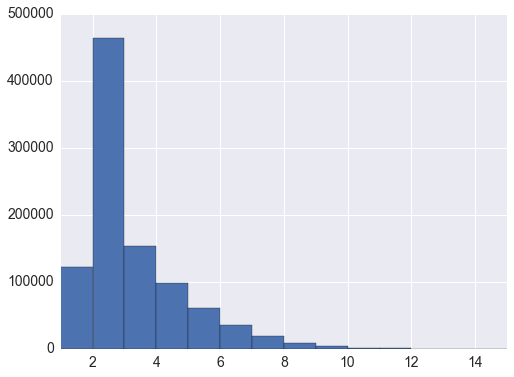

In [30]:
# make a histogram

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
data = groupedWide['NumProducts']
ax.hist(data, bins = 15)
ax.set_xlim([1, 15])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=10)


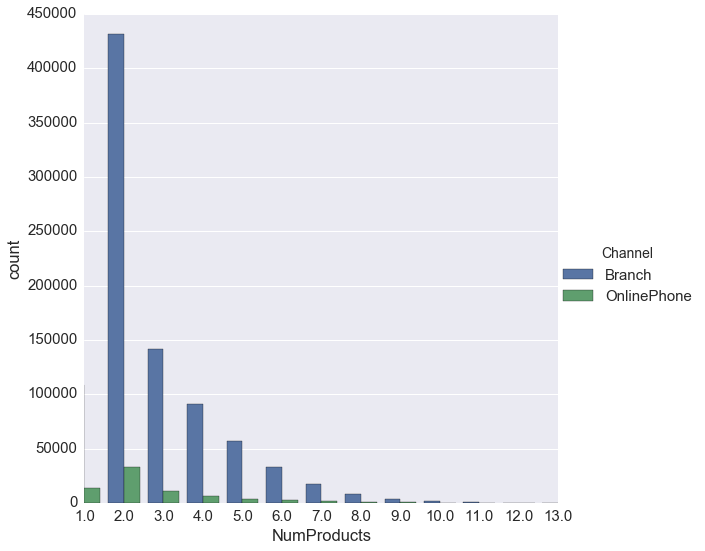

In [37]:

sns.set(font_scale=1.5)

p = sns.factorplot(x = 'NumProducts', data = groupedWide, kind = 'count', legend = 'True', hue = 'Channel', size = 8)

p.set(xlim=(0,12))


C:\Users\n846490\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


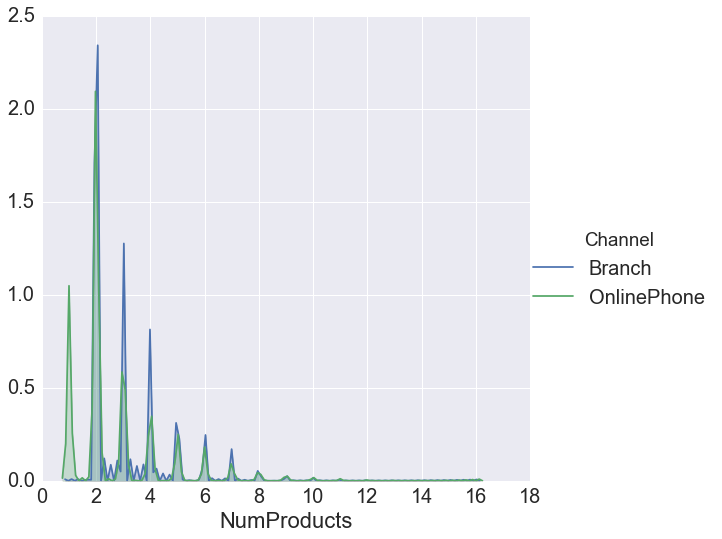

In [38]:
# try a kernel density plot

sns.set(font_scale=2.0)

fig = sns.FacetGrid(data=groupedWide, hue='Channel', size = 8)

fig.map(sns.kdeplot,'NumProducts', shade = True)

fig.add_legend(title='Channel')

In [39]:
groupedWide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967908 entries, 0 to 967907
Data columns (total 34 columns):
CustID                       967908 non-null object
Customergroups               967908 non-null object
Channel                      967908 non-null object
State                        912007 non-null object
Closed                       967908 non-null int64
Auto                         967908 non-null float64
Business_Cd                  967908 non-null float64
Business_Checking            967908 non-null float64
Business_Money_Market        967908 non-null float64
Business_Odloc               967908 non-null float64
Business_Savings             967908 non-null float64
Cdira                        967908 non-null float64
Checking                     967908 non-null float64
Commercial_Loan              967908 non-null float64
Credit_Card                  967908 non-null float64
Commercial_Iolta             967908 non-null float64
Credit_Card.1                967908 non-null fl

In [40]:
# get the fields that we need
# make two versions of the files

# 'C:\\Users\\n846490\\Documents\\Python Scripts\\SurvivalAnalysis'

groupedWideRed = groupedWide[['CustID', 'Customergroups', 'Channel', 'State','Closed', 'Auto', 'Cdira', 'Checking', 'Mortgage','Credit_Card', 'Investments', 'NumProducts']]

In [41]:
# get a view and then write it to CSV

groupedWideRed.head()

,CustID,Customergroups,Channel,State,Closed,Auto,Cdira,Checking,Mortgage,Credit_Card,Investments,NumProducts
0,F10000,Boomers+,Branch,RI,1,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,F1000008,Boomers+,Branch,CT,1,0.0,1.0,1.0,0.0,0.0,0.0,3.0
2,F100001,Boomers+,Branch,PA,1,0.0,1.0,1.0,0.0,0.0,1.0,5.0
3,F1000013,Gen X,Branch,MA,1,0.0,0.0,1.0,1.0,1.0,0.0,6.0
4,F1000030,Boomers+,Branch,PA,1,0.0,0.0,1.0,1.0,0.0,0.0,4.0


In [42]:
os.getcwd()

'C:\\Users\\n846490\\Documents\\Python Scripts\\SurvivalAnalysis'

In [43]:
groupedWideRed.to_csv('keyProductsRollup.csv')

In [44]:
# this is the full file for export

groupedWide.to_csv('allProductCount.csv')